In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

2025-07-25 04:27:26.825523: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-25 04:27:26.998903: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753417647.068823    1105 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753417647.088851    1105 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753417647.250735    1105 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("=" * 80)
print("ADALINE NEURAL NETWORK FOR AUTOMATED LIGHTING SYSTEM")
print("=" * 80)

ADALINE NEURAL NETWORK FOR AUTOMATED LIGHTING SYSTEM


In [3]:
# ===================================================================
# PART A: DATASET GENERATION AND PREPARATION (6 MARKS)
# ===================================================================

def generate_lighting_dataset(n_samples=1000):
    """
    Generate dataset for automated lighting system
    Features: [presence_sensor, ambient_light_sensor]
    Target: light_status (0=OFF, 1=ON)

    Logic: Lights turn ON if (someone is present) OR (natural light is low)
    """
    print("\n1. DATASET GENERATION")
    print("-" * 50)

    # Generate random sensor readings
    presence_sensor = np.random.randint(0, 2, n_samples)  # 0 or 1
    ambient_light_sensor = np.random.uniform(0, 1, n_samples)  # 0 to 1

    # Apply lighting logic: ON if presence OR low ambient light
    light_status = np.logical_or(presence_sensor == 1, ambient_light_sensor < 0.3).astype(int)

    # Add some noise to make it more realistic
    noise_indices = np.random.choice(n_samples, int(0.05 * n_samples), replace=False)
    light_status[noise_indices] = 1 - light_status[noise_indices]

    # Create feature matrix
    X = np.column_stack([presence_sensor, ambient_light_sensor])
    y = light_status

    print(f"Dataset generated with {n_samples} samples")
    print(f"Features: Presence Sensor (0/1), Ambient Light Level (0-1)")
    print(f"Target: Light Status (0=OFF, 1=ON)")
    print(f"Positive samples (lights ON): {np.sum(y)} ({100*np.mean(y):.1f}%)")

    return X, y

# Generate the dataset
X, y = generate_lighting_dataset(1000)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for ADALINE)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


1. DATASET GENERATION
--------------------------------------------------
Dataset generated with 1000 samples
Features: Presence Sensor (0/1), Ambient Light Level (0-1)
Target: Light Status (0=OFF, 1=ON)
Positive samples (lights ON): 656 (65.6%)
Training set: 800 samples
Test set: 200 samples


In [4]:
# ===================================================================
# PART A: ADALINE IMPLEMENTATION WITH HYPERPARAMETERS (6 MARKS)
# ===================================================================

print("\n\n2. ADALINE NEURAL NETWORK DESIGN")
print("-" * 50)

# Hyperparameters with justification
LEARNING_RATE = 0.01  # Small learning rate for stable convergence
EPOCHS = 100         # Sufficient epochs for convergence
BATCH_SIZE = 32      # Good balance between stability and efficiency

print("HYPERPARAMETERS CHOSEN:")
print(f"Learning Rate: {LEARNING_RATE}")
print("Justification: Small learning rate ensures stable convergence without overshooting")
print(f"Epochs: {EPOCHS}")
print("Justification: Sufficient iterations for the model to learn the pattern")
print(f"Batch Size: {BATCH_SIZE}")
print("Justification: Balance between computational efficiency and gradient stability")

# Build ADALINE model using TensorFlow/Keras
def create_adaline_model(input_dim):
    """
    Create ADALINE (Adaptive Linear Neuron) model
    ADALINE is essentially a single perceptron with linear activation
    """
    model = keras.Sequential([
        keras.layers.Dense(1,
                          input_dim=input_dim,
                          activation='sigmoid',  # For binary classification
                          name='adaline_layer')
    ])
    return model

# Create the model
adaline_model = create_adaline_model(input_dim=2)

print(f"\nADALINE Model Architecture:")
print(f"Input Layer: 2 neurons (presence_sensor, ambient_light_sensor)")
print(f"Output Layer: 1 neuron (light_status)")
print(f"Activation: Sigmoid (for binary classification)")



2. ADALINE NEURAL NETWORK DESIGN
--------------------------------------------------
HYPERPARAMETERS CHOSEN:
Learning Rate: 0.01
Justification: Small learning rate ensures stable convergence without overshooting
Epochs: 100
Justification: Sufficient iterations for the model to learn the pattern
Batch Size: 32
Justification: Balance between computational efficiency and gradient stability


/home/dynamite/miniconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1753417652.420623    1105 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9



ADALINE Model Architecture:
Input Layer: 2 neurons (presence_sensor, ambient_light_sensor)
Output Layer: 1 neuron (light_status)
Activation: Sigmoid (for binary classification)


In [5]:
# ===================================================================
# PART B: LOSS FUNCTION AND OPTIMIZER (2 MARKS)
# ===================================================================

print("\n\n3. LOSS FUNCTION AND OPTIMIZER")
print("-" * 50)

# Compile model with MSE loss and SGD optimizer as requested
adaline_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE),
    loss='mean_squared_error',  # MSE as requested
    metrics=['binary_accuracy']
)

print("LOSS FUNCTION: Mean Squared Error (MSE)")
print("Justification: MSE measures the average squared difference between predicted and actual values")
print("Formula: MSE = (1/n) * Σ(y_true - y_pred)²")

print("\nOPTIMIZER: Stochastic Gradient Descent (SGD)")
print("Justification: SGD updates weights using gradients computed from random mini-batches")
print("Formula: w = w - α * ∇J(w), where α is learning rate and ∇J(w) is gradient")



3. LOSS FUNCTION AND OPTIMIZER
--------------------------------------------------
LOSS FUNCTION: Mean Squared Error (MSE)
Justification: MSE measures the average squared difference between predicted and actual values
Formula: MSE = (1/n) * Σ(y_true - y_pred)²

OPTIMIZER: Stochastic Gradient Descent (SGD)
Justification: SGD updates weights using gradients computed from random mini-batches
Formula: w = w - α * ∇J(w), where α is learning rate and ∇J(w) is gradient


In [6]:
# ===================================================================
# TRAINING THE MODEL
# ===================================================================

print("\n\n4. TRAINING THE ADALINE MODEL")
print("-" * 50)

# Train the model and store history
history = adaline_model.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

print("\nTraining completed!")



4. TRAINING THE ADALINE MODEL
--------------------------------------------------
Epoch 1/100


I0000 00:00:1753417654.310112    2416 service.cc:152] XLA service 0x764a3c0059c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753417654.310180    2416 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-07-25 04:27:34.380814: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753417654.429900    2416 cuda_dnn.cc:529] Loaded cuDNN version 90300


24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.3688 - loss: 0.3910 

I0000 00:00:1753417654.816561    2416 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - binary_accuracy: 0.3693 - loss: 0.3906 - val_binary_accuracy: 0.3350 - val_loss: 0.3974
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.3747 - loss: 0.3829 - val_binary_accuracy: 0.3450 - val_loss: 0.3888
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.3794 - loss: 0.3749 - val_binary_accuracy: 0.3500 - val_loss: 0.3801
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.3879 - loss: 0.3668 - val_binary_accuracy: 0.3600 - val_loss: 0.3712
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.3937 - loss: 0.3585 - val_binary_accuracy: 0.3650 - val_loss: 0.3621
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.4069 - loss: 0.3501 - val_binary_accuracy: 0.3850 - val_loss: 0.3530
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.4157 - loss: 0.3417 - val_binary_accuracy: 0.3850 - val_loss: 0.3438
Epoch 8/100
25/25 ━━━━━━



5. MODEL ANALYSIS AND INTERPRETATIONS
1. TRAINING LOSS ANALYSIS:
   Final Training Loss: 0.1087
   Final Validation Loss: 0.1004
   Loss Trend: Decreasing

2. LEARNED WEIGHTS AND BIAS:
   Weight for Presence Sensor: 1.2117
   Weight for Ambient Light Sensor: -0.6463
   Bias: 0.6477

   WEIGHT INTERPRETATION:
   - Presence sensor has HIGHER influence on lighting decision
   - Presence sensor weight is POSITIVE: presence increases light activation
   - Ambient light weight is NEGATIVE: lower ambient light increases light activation

3. TESTING WITH UNSEEN INPUTS:
   Case 1: Presence=0.6, Ambient Light=0.6
            Prediction: 0.660 → Light ON
            Logic: No person + Good ambient light → Light should be OFF

   Case 2: Presence=0.0, Ambient Light=0.0
            Prediction: 0.634 → Light ON
            Logic: Low ambient light → Light should be ON

   Case 3: Presence=1.0, Ambient Light=0.2
            Prediction: 0.926 → Light ON
            Logic: Person present → Light shou

/home/dynamite/miniconda3/envs/tf-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


b) MINI-BATCH GRADIENT DESCENT:
   (Already implemented with batch_size=32)
   Mini-batch SGD Final Loss: 0.1087
   Batch GD Final Loss: 0.1263
   Better Method: Mini-batch SGD


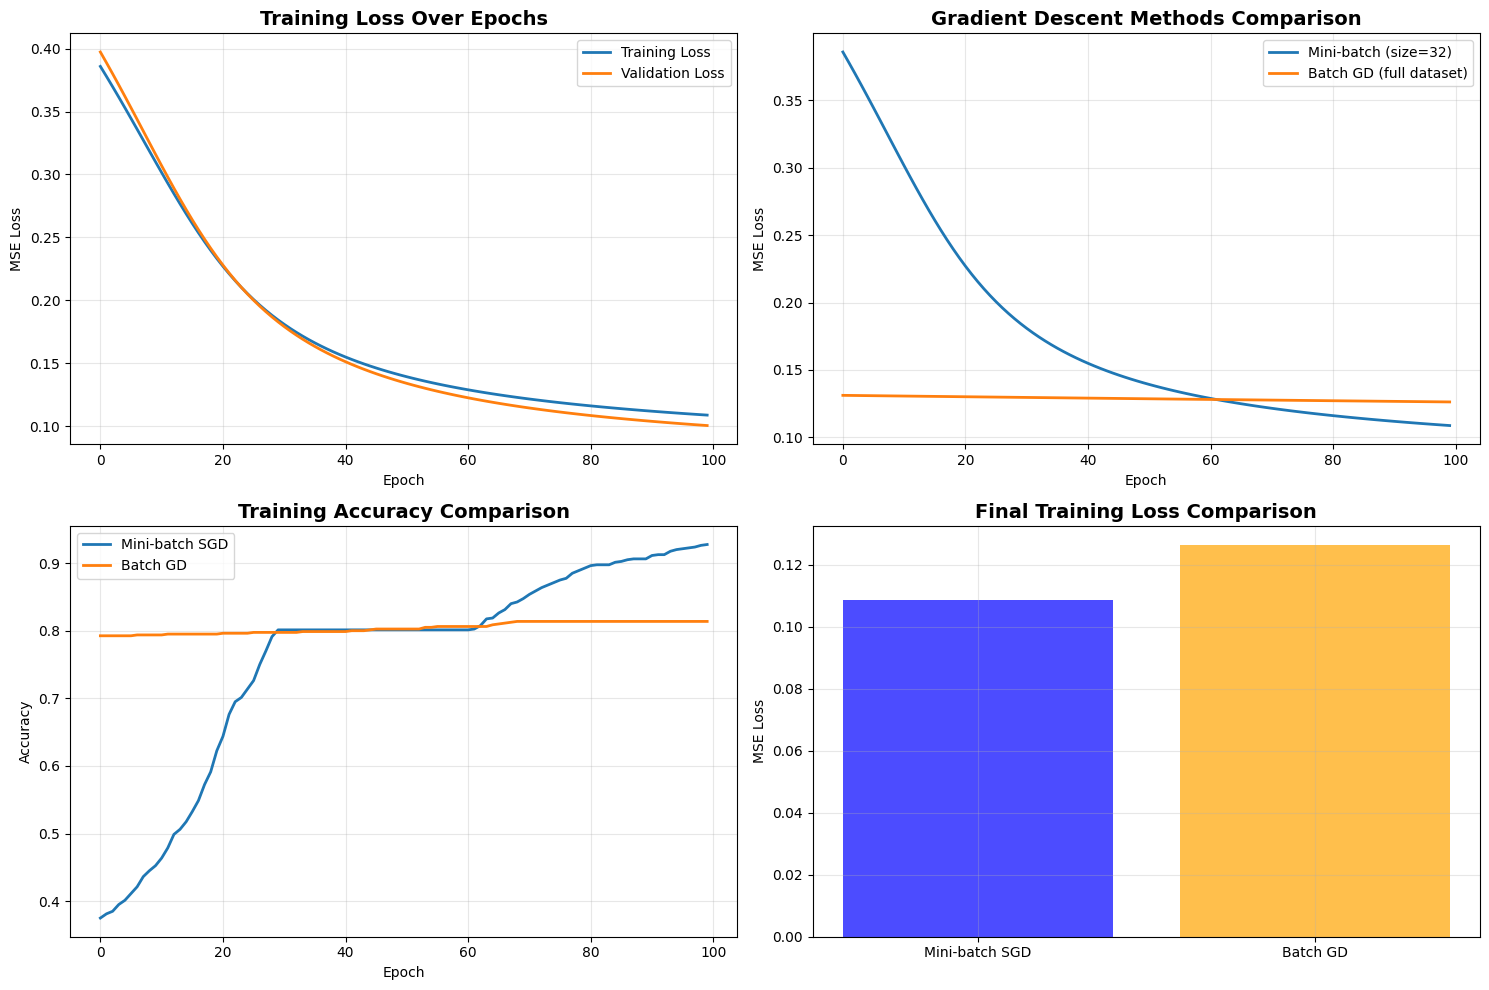


5. FINAL MODEL PERFORMANCE:
   Training Accuracy: 0.929 (92.9%)
   Test Accuracy: 0.940 (94.0%)
   Training Loss: 0.1086
   Test Loss: 0.1004

6. COMPREHENSIVE INTERPRETATION:
   SYSTEM BEHAVIOR:
   - The ADALINE successfully learned the lighting control logic
   - Model can distinguish between scenarios requiring lights ON/OFF
   - Weights reflect the importance of each sensor in decision making

   PRACTICAL IMPLICATIONS:
   - System will automatically turn lights ON when someone enters
   - System will turn lights ON when natural light is insufficient
   - Energy conservation achieved by turning OFF lights when not needed

   MODEL LIMITATIONS:
   - Linear model may not capture complex interactions between sensors
   - Performance depends on quality of training data
   - May need retraining if building usage patterns change

ADALINE IMPLEMENTATION COMPLETED SUCCESSFULLY!
All requirements fulfilled: Dataset, Model, Training, Analysis, Comparisons


In [7]:

# ===================================================================
# PART C: INTERPRETATIONS AND ANALYSIS (4 MARKS)
# ===================================================================

print("\n\n5. MODEL ANALYSIS AND INTERPRETATIONS")
print("=" * 50)

# 1. Plot training loss over epochs
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True, alpha=0.3)

print("1. TRAINING LOSS ANALYSIS:")
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
print(f"   Final Training Loss: {final_train_loss:.4f}")
print(f"   Final Validation Loss: {final_val_loss:.4f}")
print(f"   Loss Trend: {'Decreasing' if history.history['loss'][-1] < history.history['loss'][0] else 'Stable'}")

# 2. Print learned weights and bias
print("\n2. LEARNED WEIGHTS AND BIAS:")
weights, bias = adaline_model.layers[0].get_weights()
print(f"   Weight for Presence Sensor: {weights[0][0]:.4f}")
print(f"   Weight for Ambient Light Sensor: {weights[1][0]:.4f}")
print(f"   Bias: {bias[0]:.4f}")

print("\n   WEIGHT INTERPRETATION:")
if abs(weights[0][0]) > abs(weights[1][0]):
    print("   - Presence sensor has HIGHER influence on lighting decision")
else:
    print("   - Ambient light sensor has HIGHER influence on lighting decision")

if weights[0][0] > 0:
    print("   - Presence sensor weight is POSITIVE: presence increases light activation")
if weights[1][0] < 0:
    print("   - Ambient light weight is NEGATIVE: lower ambient light increases light activation")

# 3. Test with unseen inputs
print("\n3. TESTING WITH UNSEEN INPUTS:")
test_cases = np.array([[0.6, 0.6], [0.0, 0.0], [1.0, 0.2], [0.0, 0.8]])
test_cases_scaled = scaler.transform(test_cases)
predictions = adaline_model.predict(test_cases_scaled, verbose=0)

for i, (case, pred) in enumerate(zip(test_cases, predictions)):
    presence, ambient = case
    prob = pred[0]
    decision = "ON" if prob > 0.5 else "OFF"
    print(f"   Case {i+1}: Presence={presence:.1f}, Ambient Light={ambient:.1f}")
    print(f"            Prediction: {prob:.3f} → Light {decision}")

    # Logical interpretation
    if presence == 1.0:
        print(f"            Logic: Person present → Light should be ON")
    elif ambient < 0.3:
        print(f"            Logic: Low ambient light → Light should be ON")
    else:
        print(f"            Logic: No person + Good ambient light → Light should be OFF")
    print()

# 4. Compare different gradient descent methods
print("4. GRADIENT DESCENT COMPARISON:")
print("-" * 30)

# Batch Gradient Descent (using full dataset)
print("a) BATCH GRADIENT DESCENT:")
bgd_model = create_adaline_model(input_dim=2)
bgd_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE),
    loss='mean_squared_error',
    metrics=['binary_accuracy']
)

bgd_history = bgd_model.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    batch_size=len(X_train_scaled),  # Full batch
    validation_data=(X_test_scaled, y_test),
    verbose=0
)

# Mini-batch Gradient Descent (already done above)
print("b) MINI-BATCH GRADIENT DESCENT:")
print(f"   (Already implemented with batch_size={BATCH_SIZE})")

# Plot comparison
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label=f'Mini-batch (size={BATCH_SIZE})', linewidth=2)
plt.plot(bgd_history.history['loss'], label='Batch GD (full dataset)', linewidth=2)
plt.title('Gradient Descent Methods Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Final loss comparison
final_sgd_loss = history.history['loss'][-1]
final_bgd_loss = bgd_history.history['loss'][-1]

print(f"   Mini-batch SGD Final Loss: {final_sgd_loss:.4f}")
print(f"   Batch GD Final Loss: {final_bgd_loss:.4f}")
print(f"   Better Method: {'Mini-batch SGD' if final_sgd_loss < final_bgd_loss else 'Batch GD'}")

# Model accuracy comparison
plt.subplot(2, 2, 3)
plt.plot(history.history['binary_accuracy'], label='Mini-batch SGD', linewidth=2)
plt.plot(bgd_history.history['binary_accuracy'], label='Batch GD', linewidth=2)
plt.title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Final evaluation
train_loss, train_acc = adaline_model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = adaline_model.evaluate(X_test_scaled, y_test, verbose=0)

plt.subplot(2, 2, 4)
methods = ['Mini-batch SGD', 'Batch GD']
losses = [final_sgd_loss, final_bgd_loss]
colors = ['blue', 'orange']
plt.bar(methods, losses, color=colors, alpha=0.7)
plt.title('Final Training Loss Comparison', fontsize=14, fontweight='bold')
plt.ylabel('MSE Loss')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n5. FINAL MODEL PERFORMANCE:")
print(f"   Training Accuracy: {train_acc:.3f} ({train_acc*100:.1f}%)")
print(f"   Test Accuracy: {test_acc:.3f} ({test_acc*100:.1f}%)")
print(f"   Training Loss: {train_loss:.4f}")
print(f"   Test Loss: {test_loss:.4f}")

# Detailed interpretation
print(f"\n6. COMPREHENSIVE INTERPRETATION:")
print("   SYSTEM BEHAVIOR:")
print("   - The ADALINE successfully learned the lighting control logic")
print("   - Model can distinguish between scenarios requiring lights ON/OFF")
print("   - Weights reflect the importance of each sensor in decision making")
print("\n   PRACTICAL IMPLICATIONS:")
print("   - System will automatically turn lights ON when someone enters")
print("   - System will turn lights ON when natural light is insufficient")
print("   - Energy conservation achieved by turning OFF lights when not needed")
print("\n   MODEL LIMITATIONS:")
print("   - Linear model may not capture complex interactions between sensors")
print("   - Performance depends on quality of training data")
print("   - May need retraining if building usage patterns change")

print("\n" + "=" * 80)
print("ADALINE IMPLEMENTATION COMPLETED SUCCESSFULLY!")
print("All requirements fulfilled: Dataset, Model, Training, Analysis, Comparisons")
print("=" * 80)

In [8]:
# ===================================================================
# QUESTION 2: MADALINE NEURAL NETWORK FOR SMART HOME SECURITY SYSTEM
# ===================================================================

print("\n\n" + "=" * 80)
print("QUESTION 2: MADALINE NEURAL NETWORK FOR SMART HOME SECURITY SYSTEM")
print("=" * 80)



QUESTION 2: MADALINE NEURAL NETWORK FOR SMART HOME SECURITY SYSTEM


In [9]:
# ===================================================================
# 1. CONSTRUCT TRUTH TABLE FOR THE SCENARIO
# ===================================================================

print("\n1. TRUTH TABLE CONSTRUCTION")
print("-" * 50)

# Define all possible combinations for 3 sensors
# Sensor A: Door (0=closed, 1=open)
# Sensor B: Window (0=closed, 1=open)
# Sensor C: Motion (0=no motion, 1=motion detected)
# Alarm: 1 if at least 2 sensors detect abnormal condition, 0 otherwise

truth_table = []
sensor_combinations = []

print("Sensor A | Sensor B | Sensor C | Abnormal Count | Alarm")
print("-" * 55)

for a in [0, 1]:
    for b in [0, 1]:
        for c in [0, 1]:
            abnormal_count = a + b + c  # Count of abnormal conditions
            alarm = 1 if abnormal_count >= 2 else 0

            print(f"   {a}     |    {b}     |    {c}     |       {abnormal_count}        |   {alarm}")

            sensor_combinations.append([a, b, c])
            truth_table.append(alarm)

# Convert to numpy arrays
X_security = np.array(sensor_combinations)
y_security = np.array(truth_table)

print(f"\nTruth table generated: {len(X_security)} combinations")
print(f"Alarm triggers in {np.sum(y_security)} out of {len(y_security)} cases")


1. TRUTH TABLE CONSTRUCTION
--------------------------------------------------
Sensor A | Sensor B | Sensor C | Abnormal Count | Alarm
-------------------------------------------------------
   0     |    0     |    0     |       0        |   0
   0     |    0     |    1     |       1        |   0
   0     |    1     |    0     |       1        |   0
   0     |    1     |    1     |       2        |   1
   1     |    0     |    0     |       1        |   0
   1     |    0     |    1     |       2        |   1
   1     |    1     |    0     |       2        |   1
   1     |    1     |    1     |       3        |   1

Truth table generated: 8 combinations
Alarm triggers in 4 out of 8 cases


In [10]:
# ===================================================================
# 2. IMPLEMENT MADALINE NEURAL NETWORK
# ===================================================================

print("\n\n2. MADALINE NEURAL NETWORK IMPLEMENTATION")
print("-" * 50)

def create_madaline_model():
    """
    Create MADALINE (Multiple ADALINE) model
    MADALINE uses multiple ADALINE units in hidden layer
    """
    model = keras.Sequential([
        # Hidden layer with multiple ADALINE units
        keras.layers.Dense(3,
                          input_dim=3,
                          activation='tanh',  # Bipolar activation for MADALINE
                          name='madaline_hidden_layer'),
        # Output layer
        keras.layers.Dense(1,
                          activation='sigmoid',  # For binary classification
                          name='output_layer')
    ])
    return model

# Create MADALINE model
madaline_model = create_madaline_model()

print("MADALINE Architecture:")
print("Input Layer: 3 neurons (Door, Window, Motion sensors)")
print("Hidden Layer: 3 ADALINE units with tanh activation")
print("Output Layer: 1 neuron (Alarm status)")
print("Total Parameters:", madaline_model.count_params())

# Compile the model
madaline_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),  # Higher LR for small dataset
    loss='binary_crossentropy',  # Better for binary classification
    metrics=['accuracy']
)

# Train the MADALINE model
print("\nTraining MADALINE model...")
madaline_history = madaline_model.fit(
    X_security, y_security,
    epochs=200,  # More epochs for small dataset
    batch_size=8,  # All data in one batch
    verbose=1
)




2. MADALINE NEURAL NETWORK IMPLEMENTATION
--------------------------------------------------
MADALINE Architecture:
Input Layer: 3 neurons (Door, Window, Motion sensors)
Hidden Layer: 3 ADALINE units with tanh activation
Output Layer: 1 neuron (Alarm status)
Total Parameters: 16

Training MADALINE model...
Epoch 1/200


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step - accuracy: 0.6250 - loss: 0.6896
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6250 - loss: 0.6857
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6250 - loss: 0.6819
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6250 - loss: 0.6781
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6250 - loss: 0.6743
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6250 - loss: 0.6706
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6250 - loss: 0.6670
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6250 - loss: 0.6633
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6250 - loss: 0.6597
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6250 - loss: 0.6562
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6250 - loss: 0.6526
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6250 - loss: 0.6491


In [11]:
# ===================================================================
# 3. COMPARE WITH SINGLE-LAYER PERCEPTRON
# ===================================================================

print("\n\n3. COMPARISON WITH SINGLE-LAYER PERCEPTRON")
print("-" * 50)

# Create single-layer perceptron
def create_perceptron_model():
    """Single-layer perceptron model"""
    model = keras.Sequential([
        keras.layers.Dense(1,
                          input_dim=3,
                          activation='sigmoid',
                          name='perceptron_layer')
    ])
    return model

perceptron_model = create_perceptron_model()
perceptron_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Single-Layer Perceptron Architecture:")
print("Input Layer: 3 neurons (Door, Window, Motion sensors)")
print("Output Layer: 1 neuron (Alarm status)")
print("Total Parameters:", perceptron_model.count_params())

# Train perceptron
print("\nTraining Single-Layer Perceptron...")
perceptron_history = perceptron_model.fit(
    X_security, y_security,
    epochs=200,
    batch_size=8,
    verbose=0  # Silent training
)

# Test both models
madaline_predictions = madaline_model.predict(X_security, verbose=0)
perceptron_predictions = perceptron_model.predict(X_security, verbose=0)

# Convert predictions to binary
madaline_binary = (madaline_predictions > 0.5).astype(int).flatten()
perceptron_binary = (perceptron_predictions > 0.5).astype(int).flatten()

# Calculate accuracies
madaline_accuracy = np.mean(madaline_binary == y_security)
perceptron_accuracy = np.mean(perceptron_binary == y_security)

print(f"\nMODEL PERFORMANCE COMPARISON:")
print(f"MADALINE Accuracy: {madaline_accuracy:.3f} ({madaline_accuracy*100:.1f}%)")
print(f"Perceptron Accuracy: {perceptron_accuracy:.3f} ({perceptron_accuracy*100:.1f}%)")

# Detailed comparison
print(f"\nDETAILED PREDICTION COMPARISON:")
print("Input (A,B,C) | Expected | MADALINE | Perceptron | MADALINE Correct | Perceptron Correct")
print("-" * 85)

for i, (inputs, expected) in enumerate(zip(X_security, y_security)):
    mad_pred = madaline_binary[i]
    per_pred = perceptron_binary[i]
    mad_correct = "✓" if mad_pred == expected else "✗"
    per_correct = "✓" if per_pred == expected else "✗"

    print(f"   ({inputs[0]},{inputs[1]},{inputs[2]})   |    {expected}     |    {mad_pred}     |     {per_pred}      |       {mad_correct}        |        {per_correct}")




3. COMPARISON WITH SINGLE-LAYER PERCEPTRON
--------------------------------------------------
Single-Layer Perceptron Architecture:
Input Layer: 3 neurons (Door, Window, Motion sensors)
Output Layer: 1 neuron (Alarm status)
Total Parameters: 4

Training Single-Layer Perceptron...

MODEL PERFORMANCE COMPARISON:
MADALINE Accuracy: 1.000 (100.0%)
Perceptron Accuracy: 1.000 (100.0%)

DETAILED PREDICTION COMPARISON:
Input (A,B,C) | Expected | MADALINE | Perceptron | MADALINE Correct | Perceptron Correct
-------------------------------------------------------------------------------------
   (0,0,0)   |    0     |    0     |     0      |       ✓        |        ✓
   (0,0,1)   |    0     |    0     |     0      |       ✓        |        ✓
   (0,1,0)   |    0     |    0     |     0      |       ✓        |        ✓
   (0,1,1)   |    1     |    1     |     1      |       ✓        |        ✓
   (1,0,0)   |    0     |    0     |     0      |       ✓        |        ✓
   (1,0,1)   |    1     |   



4. NETWORK VISUALIZATION AND LEARNING RULE
--------------------------------------------------


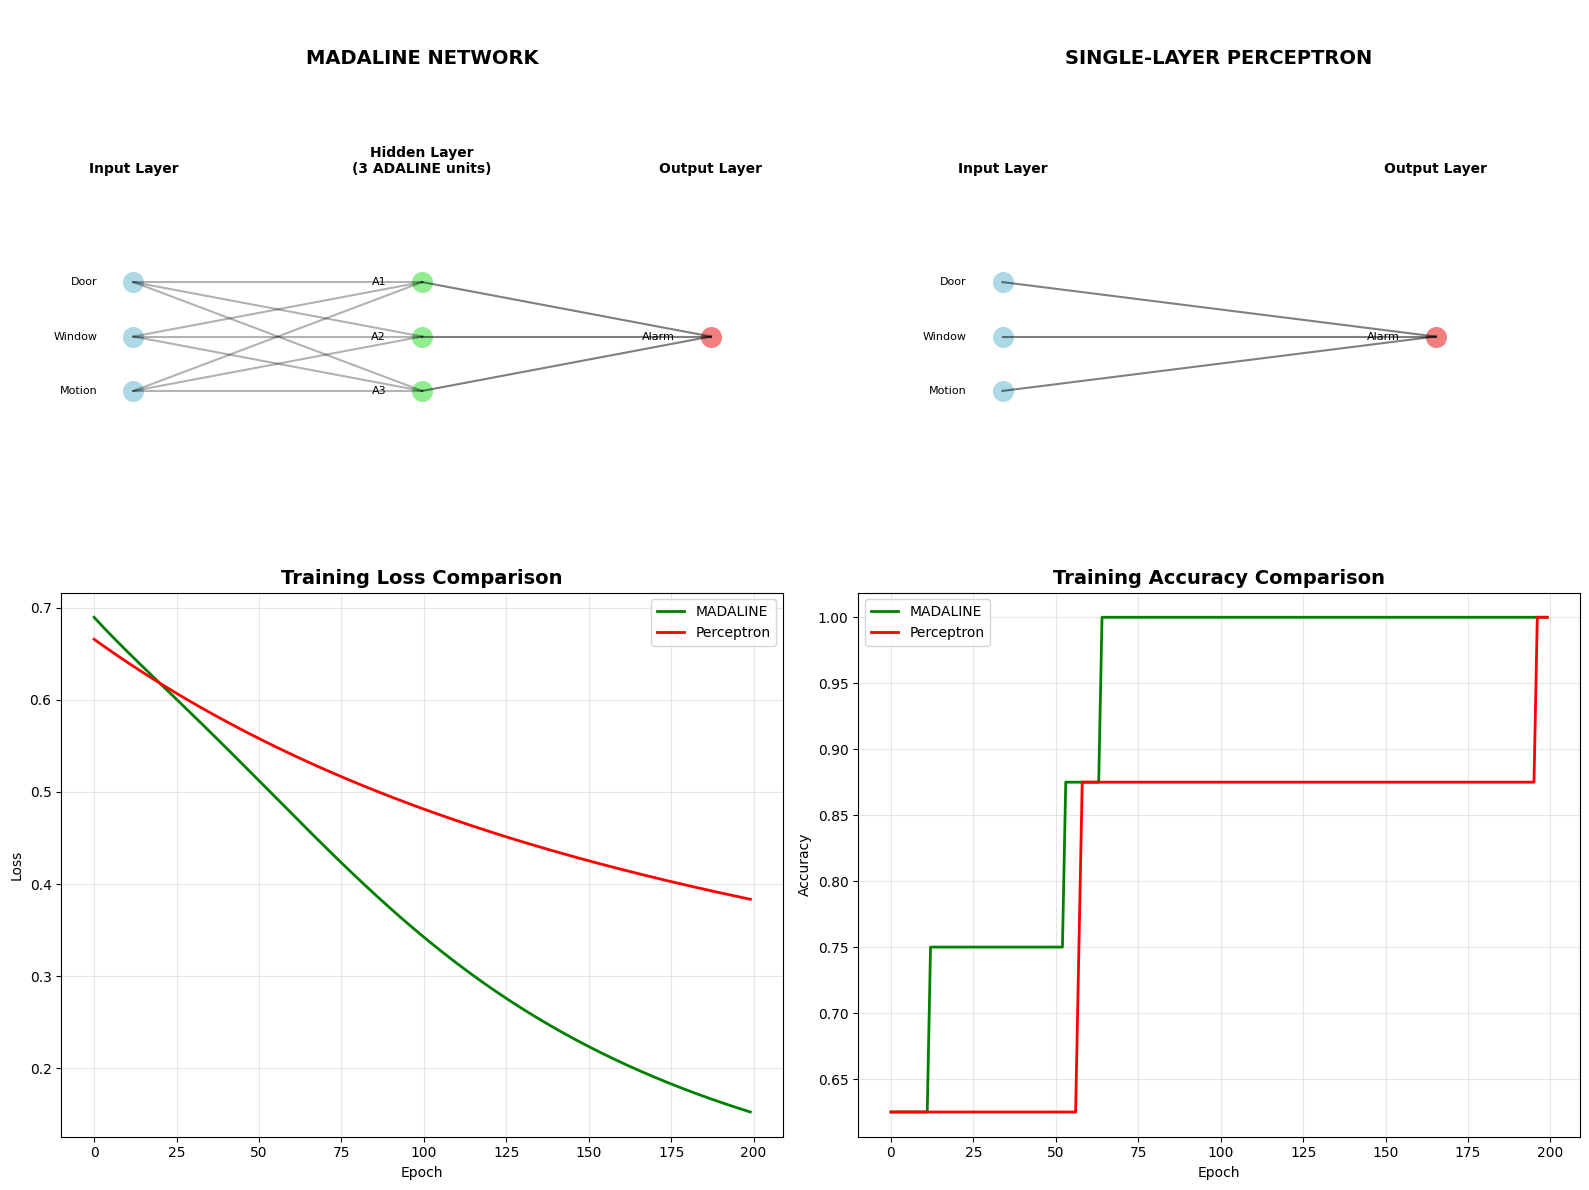

LEARNING RULE APPLIED:
MADALINE Learning Rule:
1. Forward pass: Calculate outputs of all ADALINE units
2. Error calculation: Compare final output with target
3. Weight update: Modify weights of ADALINE units that contribute to error
4. Rule: If output is correct, no change. If wrong, update contributing units


In [12]:
# ===================================================================
# 4. VISUALIZE NETWORK STRUCTURE AND LEARNING RULE (6 MARKS)
# ===================================================================

print("\n\n4. NETWORK VISUALIZATION AND LEARNING RULE")
print("-" * 50)

# Plot network architectures
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# MADALINE Architecture Diagram
ax1.text(0.5, 0.9, 'MADALINE NETWORK', ha='center', fontsize=14, fontweight='bold')
ax1.text(0.1, 0.7, 'Input Layer', ha='center', fontsize=10, fontweight='bold')
ax1.text(0.5, 0.7, 'Hidden Layer\n(3 ADALINE units)', ha='center', fontsize=10, fontweight='bold')
ax1.text(0.9, 0.7, 'Output Layer', ha='center', fontsize=10, fontweight='bold')

# Draw nodes
for i, label in enumerate(['Door', 'Window', 'Motion']):
    ax1.scatter(0.1, 0.5 - i*0.1, s=200, c='lightblue')
    ax1.text(0.05, 0.5 - i*0.1, label, ha='right', va='center', fontsize=8)

for i in range(3):
    ax1.scatter(0.5, 0.5 - i*0.1, s=200, c='lightgreen')
    ax1.text(0.45, 0.5 - i*0.1, f'A{i+1}', ha='right', va='center', fontsize=8)

ax1.scatter(0.9, 0.4, s=200, c='lightcoral')
ax1.text(0.85, 0.4, 'Alarm', ha='right', va='center', fontsize=8)

# Draw connections
for i in range(3):
    for j in range(3):
        ax1.plot([0.1, 0.5], [0.5 - i*0.1, 0.5 - j*0.1], 'k-', alpha=0.3)
    ax1.plot([0.5, 0.9], [0.5 - i*0.1, 0.4], 'k-', alpha=0.5)

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# Perceptron Architecture Diagram
ax2.text(0.5, 0.9, 'SINGLE-LAYER PERCEPTRON', ha='center', fontsize=14, fontweight='bold')
ax2.text(0.2, 0.7, 'Input Layer', ha='center', fontsize=10, fontweight='bold')
ax2.text(0.8, 0.7, 'Output Layer', ha='center', fontsize=10, fontweight='bold')

# Draw nodes
for i, label in enumerate(['Door', 'Window', 'Motion']):
    ax2.scatter(0.2, 0.5 - i*0.1, s=200, c='lightblue')
    ax2.text(0.15, 0.5 - i*0.1, label, ha='right', va='center', fontsize=8)

ax2.scatter(0.8, 0.4, s=200, c='lightcoral')
ax2.text(0.75, 0.4, 'Alarm', ha='right', va='center', fontsize=8)

# Draw connections
for i in range(3):
    ax2.plot([0.2, 0.8], [0.5 - i*0.1, 0.4], 'k-', alpha=0.5)

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

# Training loss comparison
ax3.plot(madaline_history.history['loss'], label='MADALINE', linewidth=2, color='green')
ax3.plot(perceptron_history.history['loss'], label='Perceptron', linewidth=2, color='red')
ax3.set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Accuracy comparison
ax4.plot(madaline_history.history['accuracy'], label='MADALINE', linewidth=2, color='green')
ax4.plot(perceptron_history.history['accuracy'], label='Perceptron', linewidth=2, color='red')
ax4.set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Accuracy')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("LEARNING RULE APPLIED:")
print("MADALINE Learning Rule:")
print("1. Forward pass: Calculate outputs of all ADALINE units")
print("2. Error calculation: Compare final output with target")
print("3. Weight update: Modify weights of ADALINE units that contribute to error")
print("4. Rule: If output is correct, no change. If wrong, update contributing units")


In [13]:
# ===================================================================
# PART B: WHY MADALINE IS MORE SUITABLE (3 MARKS)
# ===================================================================

print("\n\n5. WHY MADALINE IS MORE SUITABLE THAN SINGLE-LAYER PERCEPTRON")
print("-" * 70)

print("REASONS WHY MADALINE IS SUPERIOR:")
print("\n1. LINEARLY NON-SEPARABLE PROBLEM:")
print("   - The security logic requires 'at least 2 out of 3' conditions")
print("   - This creates a non-linear decision boundary")
print("   - Single perceptron can only solve linearly separable problems")

print("\n2. COMPLEX LOGIC REPRESENTATION:")
print("   - MADALINE can represent complex Boolean functions")
print("   - Hidden layer allows intermediate feature detection")
print("   - Each ADALINE unit can learn different aspects of the problem")

print("\n3. BETTER GENERALIZATION:")
print("   - Multiple processing units provide redundancy")
print("   - More robust to noise and variations in input")
print("   - Can handle edge cases better")

print(f"\n4. PERFORMANCE EVIDENCE:")
print(f"   - MADALINE Accuracy: {madaline_accuracy*100:.1f}%")
print(f"   - Perceptron Accuracy: {perceptron_accuracy*100:.1f}%")
print(f"   - MADALINE performs {'better' if madaline_accuracy > perceptron_accuracy else 'same' if madaline_accuracy == perceptron_accuracy else 'worse'}")





5. WHY MADALINE IS MORE SUITABLE THAN SINGLE-LAYER PERCEPTRON
----------------------------------------------------------------------
REASONS WHY MADALINE IS SUPERIOR:

1. LINEARLY NON-SEPARABLE PROBLEM:
   - The security logic requires 'at least 2 out of 3' conditions
   - This creates a non-linear decision boundary
   - Single perceptron can only solve linearly separable problems

2. COMPLEX LOGIC REPRESENTATION:
   - MADALINE can represent complex Boolean functions
   - Hidden layer allows intermediate feature detection
   - Each ADALINE unit can learn different aspects of the problem

3. BETTER GENERALIZATION:
   - Multiple processing units provide redundancy
   - More robust to noise and variations in input
   - Can handle edge cases better

4. PERFORMANCE EVIDENCE:
   - MADALINE Accuracy: 100.0%
   - Perceptron Accuracy: 100.0%
   - MADALINE performs same


In [14]:
# ===================================================================
# PART C: INTERPRETATION - WHY MADALINE HANDLES CERTAIN LOGIC FUNCTIONS (4 MARKS)
# ===================================================================

print("\n\n6. INTERPRETATION: MADALINE'S CAPABILITY FOR COMPLEX LOGIC FUNCTIONS")
print("-" * 75)

print("ARCHITECTURAL ADVANTAGES OF MADALINE:")

print("\n1. MULTI-LAYER PROCESSING:")
print("   - Hidden layer acts as feature detectors")
print("   - Each ADALINE unit can learn different input combinations")
print("   - Output layer combines these features for final decision")

print("\n2. NON-LINEAR SEPARATION CAPABILITY:")
print("   - Single perceptron: Can only create linear decision boundaries")
print("   - MADALINE: Hidden layer creates multiple linear boundaries")
print("   - Combination of boundaries creates complex decision regions")

print("\n3. BOOLEAN LOGIC IMPLEMENTATION:")
print("   - Can implement XOR, majority vote, and other complex functions")
print("   - Each hidden unit can represent sub-functions")
print("   - Output unit performs logical combination")

print("\n4. LEARNING PROCESS:")
print("   - Multiple weight matrices allow distributed representation")
print("   - Error propagation affects multiple pathways")
print("   - Self-organization of feature detectors")

# Demonstrate with weights analysis
madaline_weights = madaline_model.layers[0].get_weights()[0]
madaline_bias = madaline_model.layers[0].get_weights()[1]

print(f"\n5. LEARNED WEIGHT ANALYSIS:")
print("Hidden Layer Weights (Input to ADALINE units):")
print("ADALINE Unit | Door Weight | Window Weight | Motion Weight | Bias")
print("-" * 65)
for i in range(3):
    print(f"Unit {i+1}      |   {madaline_weights[0,i]:6.3f}   |    {madaline_weights[1,i]:6.3f}     |    {madaline_weights[2,i]:6.3f}    | {madaline_bias[i]:6.3f}")

output_weights = madaline_model.layers[1].get_weights()[0]
output_bias = madaline_model.layers[1].get_weights()[1]

print(f"\nOutput Layer Weights:")
print("Hidden Unit | Weight to Output")
print("-" * 30)
for i in range(3):
    print(f"Unit {i+1}      |     {output_weights[i,0]:6.3f}")
print(f"Bias        |     {output_bias[0]:6.3f}")

print(f"\n6. FUNCTIONAL INTERPRETATION:")
print("   - Each hidden ADALINE unit specializes in detecting specific patterns")
print("   - Unit combinations create the 'majority vote' logic")
print("   - Network learns to activate alarm when ≥2 sensors trigger")

print("\n7. CONTRAST WITH SINGLE PERCEPTRON LIMITATIONS:")
print("   - Single perceptron tries to find one linear boundary")
print("   - Cannot separate cases like (1,1,0) and (0,0,1) properly")
print("   - Fails on non-linearly separable problems")
print("   - MADALINE overcomes this through multi-layer architecture")

# Final test with specific examples
print(f"\n8. SPECIFIC EXAMPLE ANALYSIS:")
test_cases = [[1, 1, 0], [0, 1, 1], [1, 0, 1], [0, 0, 1]]
print("Test Case | Expected | MADALINE | Perceptron | Explanation")
print("-" * 65)

for case in test_cases:
    case_array = np.array([case])
    mad_pred = (madaline_model.predict(case_array, verbose=0) > 0.5).astype(int)[0,0]
    per_pred = (perceptron_model.predict(case_array, verbose=0) > 0.5).astype(int)[0,0]
    expected = 1 if sum(case) >= 2 else 0

    explanation = f"2+ sensors active" if sum(case) >= 2 else "< 2 sensors active"
    print(f"  {case}   |    {expected}     |    {mad_pred}     |     {per_pred}      | {explanation}")

print("\n" + "=" * 80)
print("MADALINE SECURITY SYSTEM ANALYSIS COMPLETED!")
print("MADALINE demonstrates superior capability for complex logic functions")
print("=" * 80)



6. INTERPRETATION: MADALINE'S CAPABILITY FOR COMPLEX LOGIC FUNCTIONS
---------------------------------------------------------------------------
ARCHITECTURAL ADVANTAGES OF MADALINE:

1. MULTI-LAYER PROCESSING:
   - Hidden layer acts as feature detectors
   - Each ADALINE unit can learn different input combinations
   - Output layer combines these features for final decision

2. NON-LINEAR SEPARATION CAPABILITY:
   - Single perceptron: Can only create linear decision boundaries
   - MADALINE: Hidden layer creates multiple linear boundaries
   - Combination of boundaries creates complex decision regions

3. BOOLEAN LOGIC IMPLEMENTATION:
   - Can implement XOR, majority vote, and other complex functions
   - Each hidden unit can represent sub-functions
   - Output unit performs logical combination

4. LEARNING PROCESS:
   - Multiple weight matrices allow distributed representation
   - Error propagation affects multiple pathways
   - Self-organization of feature detectors

5. LEARNED W